In [1]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
from sklearn import decomposition

In [3]:
data =pd.read_csv('https://raw.githubusercontent.com/bachir151/Projet-openclassrooms/master/P4/table_segmentation.csv')
data.head()

,customer_unique_id,Nb_inactive_days,frequency,montant,note_com,frais_livraison,temps_moyen_livraison,Alimentation et Boissons,Auto et Moto,Autres,Livres et Médias,Maison et Jardin,Mode,Santé et Beauté,Sports et Loisirs,Électronique
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,5.0,12.00,6.0,0,0,0,0,1,0,0,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4.0,8.29,3.0,0,0,0,0,0,0,1,0,0
2,0000f46a3911fa3c0805444483337064,536,1,86.22,3.0,17.22,25.0,0,0,0,0,0,0,0,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,4.0,17.63,20.0,0,0,0,0,0,0,0,0,1
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,5.0,16.89,13.0,0,0,0,0,0,0,0,0,1


In [4]:
data.shape

(92493, 16)

Je vais découper le jeu de données en trois tableau 

---



In [5]:
data.columns.to_list()

['customer_unique_id',
 'Nb_inactive_days',
 'frequency',
 'montant',
 'note_com',
 'frais_livraison',
 'temps_moyen_livraison',
 'Alimentation et Boissons',
 'Auto et Moto',
 'Autres',
 'Livres et Médias',
 'Maison et Jardin',
 'Mode',
 'Santé et Beauté',
 'Sports et Loisirs',
 'Électronique']

In [6]:
segment_1 = data[['customer_unique_id','Nb_inactive_days','frequency','montant']]  # Correspond à table RFM
segment_2 = data[['customer_unique_id','Nb_inactive_days','frequency','montant','note_com','frais_livraison','temps_moyen_livraison']]
segment_3 = data

In [7]:
segment_1.head()

,customer_unique_id,Nb_inactive_days,frequency,montant
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,536,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89


In [8]:
segment_2.head()

,customer_unique_id,Nb_inactive_days,frequency,montant,note_com,frais_livraison,temps_moyen_livraison
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,5.0,12.00,6.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4.0,8.29,3.0
2,0000f46a3911fa3c0805444483337064,536,1,86.22,3.0,17.22,25.0
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,4.0,17.63,20.0
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,5.0,16.89,13.0


In [9]:
segment_3.head()

,customer_unique_id,Nb_inactive_days,frequency,montant,note_com,frais_livraison,temps_moyen_livraison,Alimentation et Boissons,Auto et Moto,Autres,Livres et Médias,Maison et Jardin,Mode,Santé et Beauté,Sports et Loisirs,Électronique
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,5.0,12.00,6.0,0,0,0,0,1,0,0,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4.0,8.29,3.0,0,0,0,0,0,0,1,0,0
2,0000f46a3911fa3c0805444483337064,536,1,86.22,3.0,17.22,25.0,0,0,0,0,0,0,0,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,4.0,17.63,20.0,0,0,0,0,0,0,0,0,1
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,5.0,16.89,13.0,0,0,0,0,0,0,0,0,1


In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics.cluster import adjusted_rand_score


# Choix des algorithmes 

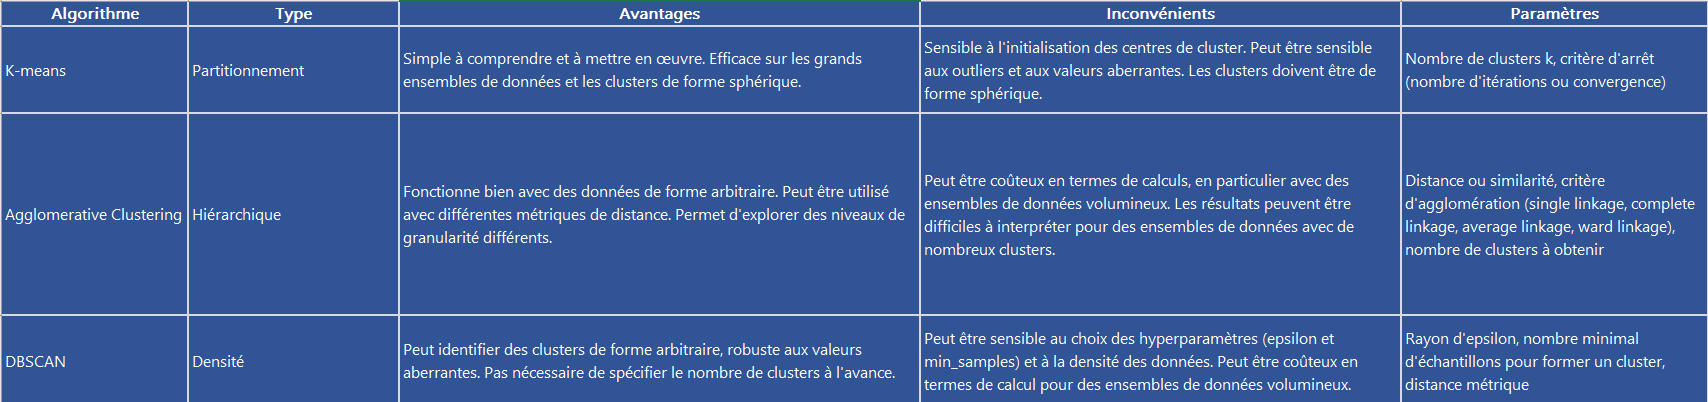

#Méthode k-means 

le principe est de laisser la machine classer nos données selon leur ressemblance. 

1) On place des centroides au hasard au niveau de notre espace de données 
2) on affecte chaque point du dataset au centroide le plus proche. On forme ainsi des clusters
3) On déplace chaque centroide au milieu de son cluster 
4) On répéte les premières étapes jusqu'à ce que les centroides soient en position d'équilibre 

l'algorithme kmeans chereche à minismiser la variance des clusters . Fonction  Loss = $ ∑ {min}_{μ_{i} ∈ C} (|| x_{i}-μ_{j}||^2) $

**Note :**

Excuter le k means plusieurs fois pour éviter que le choix des centroides initiaux influe sur les positions d'équilibre des centroides finaux.

kmeans++ : envoyer les centroides initiaux vers des positions qui les éloignent les des autres afin d'accéler la convergence de ceux-ci vers des positions d'équilibre. C'est une méthode d'initialisation.




Pour prédire le cluster auquel appartient une nouvelle données, l'algorithme kmeans place cette données dans l'espace des données, puis calcule la distance entre cette nouvelle données et les centroides finaux. 

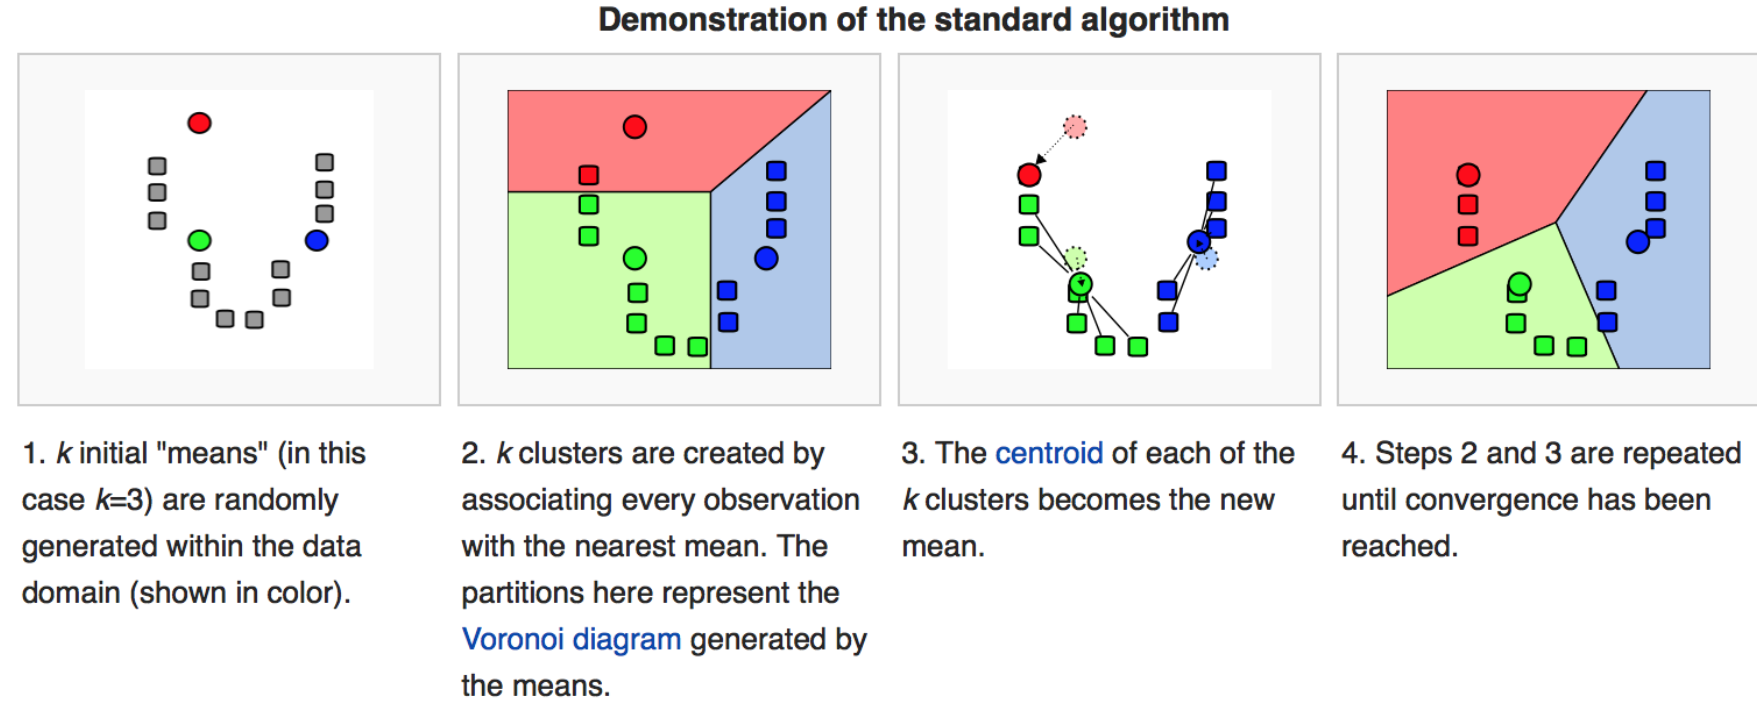

Inertie = fonction coût > model.inertia_  = la somme des distances entre les points d'un cluster et les centroides. 

score nous donne la même valeur que inertia sous forme négative : model.score =- model.inertia

Comment choisir le bon nombre de cluster pour notre dataset >  Elbow = permet de visualiser l'évolution de la fonction coût de notre modèle en fonction du nombre de cluster et de détecter une zone de coude , cette zone nous indique le nombre de cluster optimal.

``` inertia =[]
nb_cluster = range(1,10)
for k in nb_cluster:  
  model= KMeans(n_clusters=k,random_state=0, n_init=10,).fit(segment_1_sample)
  inertia.append(model.inertia_)
plt.plot(nb_cluster, inertia)```

# k-means pour la table **segment_1**

In [11]:
# StandardScaler
scaler = StandardScaler()

In [12]:
segment_1_copy=segment_1.drop(['customer_unique_id'], axis=1).copy()
#segment_1_sample_x = segment_1.sample(frac = .25, random_state = 42) # faire le cluster avec l'ensemble des données
segment_1_scaled = scaler.fit_transform (segment_1_copy)

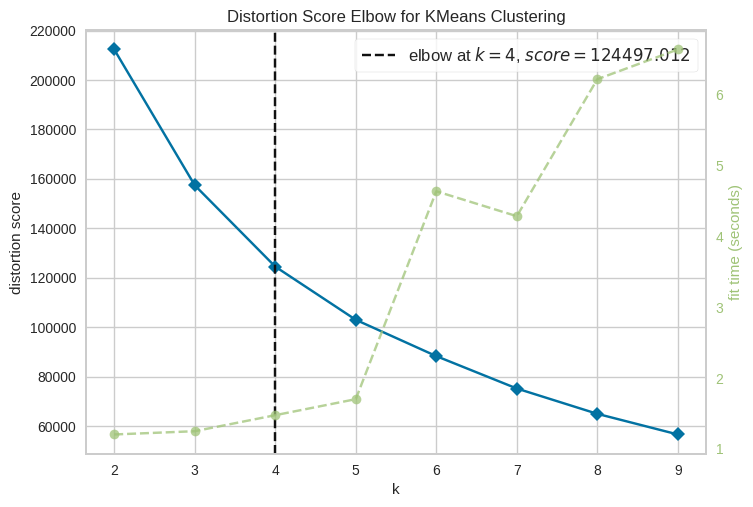



Nombre optimal de clusters pour segment_1 :  4
Score de silhouette pour segment_1 :  0.477953722637664
Labels de clusters pour segment_1 :  [2 2 1 ... 1 2 1]
CPU times: user 2min 7s, sys: 35.7 s, total: 2min 42s
Wall time: 2min 28s


In [13]:
%%time
# Pour segment_1
model =KMeans(random_state=0,n_init=10)
visualizer_1 = KElbowVisualizer(model, k=(2, 10))
visualizer_1.fit(segment_1_scaled)
visualizer_1.show()


kmeans_1 = KMeans(n_clusters=visualizer_1.elbow_value_, random_state=0,n_init=10).fit(segment_1_scaled)
labels_1 = kmeans_1.labels_  # je peux utliser kmeans_1.predict (segement_1_sample)
score_1 = silhouette_score(segment_1_scaled, labels_1)

print("\n")
print("Nombre optimal de clusters pour segment_1 : ", visualizer_1.elbow_value_)
print("Score de silhouette pour segment_1 : ", score_1)
print("Labels de clusters pour segment_1 : ", labels_1)

Par défaut, le paramètre de score est réglé sur la <ins>**métrique de la distorsion** </ins>, qui calcule la somme des distances au carré de chaque point à son centre assigné (centroide). Cependant, deux autres métriques peuvent également être utilisées avec le KElbowVisualizer : **silhouette** et **calinski_harabaz**. 

- Le score de **calinski_harabaz** calcule le ratio de dispersion entre les clusters et à l'intérieur de ceux-ci
- Le score de **silhouette** est le coefficient de silhouette moyen pour tous les échantillons


# Visualisation calinski_harabaz

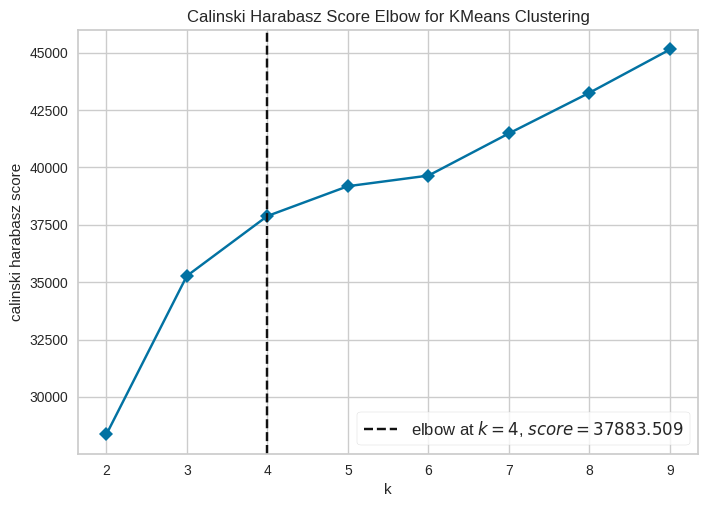

CPU times: user 17.2 s, sys: 5.97 s, total: 23.2 s
Wall time: 13.7 s


<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [14]:
%%time
visualizer_1 = KElbowVisualizer(model, k=(2, 10), metric='calinski_harabasz', timings=False)
visualizer_1.fit(segment_1_scaled)
visualizer_1.show()
#plt.title('Elbow method pour segment_1')

# Visualisation silouhette

Silhouette Visualizer
L'analyse de silhouette peut être utilisée pour évaluer la densité et la séparation entre les clusters. Le score est calculé en moyennant le coefficient de silhouette pour chaque échantillon, qui est calculé comme la différence entre la distance moyenne intra-cluster et la distance moyenne au cluster le plus proche pour chaque échantillon, normalisé par la valeur maximale. Cela produit un score compris entre -1 et +1, où les scores proches de +1 indiquent une grande séparation et les scores proches de -1 indiquent que les échantillons ont peut-être été assignés au mauvais cluster.

"Le Silhouette Visualizer affiche le coefficient de silhouette pour chaque échantillon sur une base par cluster, visualisant quels clusters sont denses et lesquels ne le sont pas. Cela est particulièrement utile pour déterminer le déséquilibre des clusters, ou pour sélectionner une valeur pour K en comparant plusieurs visualiseurs.

source : https://www.kaggle.com/code/kautumn06/yellowbrick-clustering-evaluation-examples/notebook

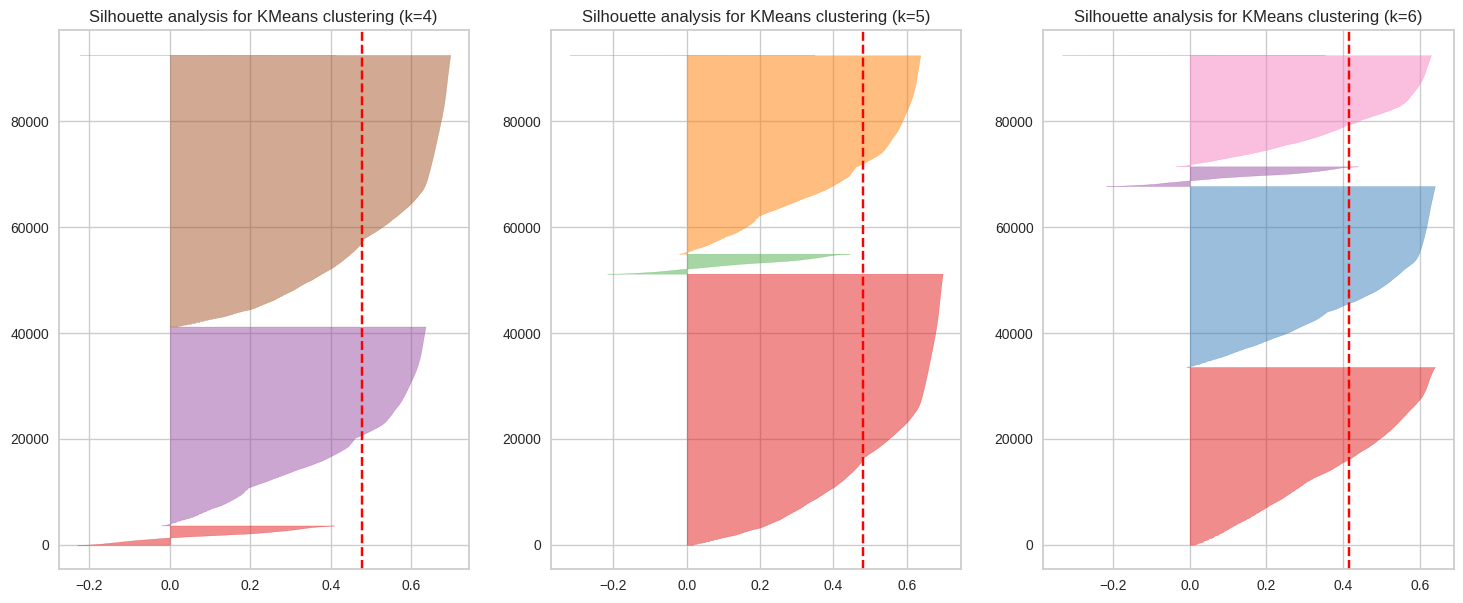

CPU times: user 9min 56s, sys: 3min 7s, total: 13min 3s
Wall time: 10min 34s


In [15]:
%%time
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# Les différents nombres de cluster à tester
cluster_range = range(4, 7)

# Creation de la figure et des subplots
fig, axs = plt.subplots(1, len(cluster_range), figsize=(6 * len(cluster_range), 7))

for i, k in enumerate(cluster_range):
    # clustering model et visualizer pourk clusters
    model = KMeans(k, n_init=10, random_state=0)
    visualizer =  SilhouetteVisualizer(model, ax=axs[i])

    # Fit des données to
    visualizer.fit(segment_1_scaled)
    #visualizer.show()

    # Set the title of the subplot
    axs[i].set_title(f"Silhouette analysis for KMeans clustering (k={k})")

# Display the plot
plt.show()

Recommandation :Idéalement, les formes de tous les clusters devraient s'étendre bien au-delà de la ligne verticale du score de silhouette moyen ; et les clusters devraient avoir une largeur similaire, idéalement même une largeur uniforme.

Mon choix du nombre optimal de cluster s'est basé sur la recommandation ci-dessus.

# Visualisation 3D des clusters 

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
%%time
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(segment_1_scaled)
clusters = kmeans.labels_
segment_1['cluster'] = clusters
segment_1['cluster'] = segment_1['cluster'].astype("category")  

CPU times: user 2.81 s, sys: 442 ms, total: 3.25 s
Wall time: 3.73 s


In [25]:
segment_1['cluster'].value_counts()

1    51092
0    37744
2     3634
3       23
Name: cluster, dtype: int64

In [19]:
from google.colab import drive
drive.mount('/content/drive')

filepath ='/content/drive/MyDrive/segment_1.csv'

#food_data.to_csv(filepath,encoding= 'utf-8')  
segment_1.to_csv(filepath, index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import plotly.express as px
fig = px.scatter_3d(segment_1, x="Nb_inactive_days", y="frequency", z="montant", color="cluster")
fig.show()

# Nombre de clusters : graphiques de distances inter-clusters 

Enfin, les graphiques de distances inter-clusters de Yellowbrick nous permettent d'étudier les clusters sous un autre angle.

Ce graphique visualise la distance et la taille relative des clusters. Il représente les centres des clusters en seulement deux dimensions. Les tailles des bulles représentent le nombre d'observations dans chaque cluster.

CPU times: user 1.63 s, sys: 447 ms, total: 2.08 s
Wall time: 2.49 s


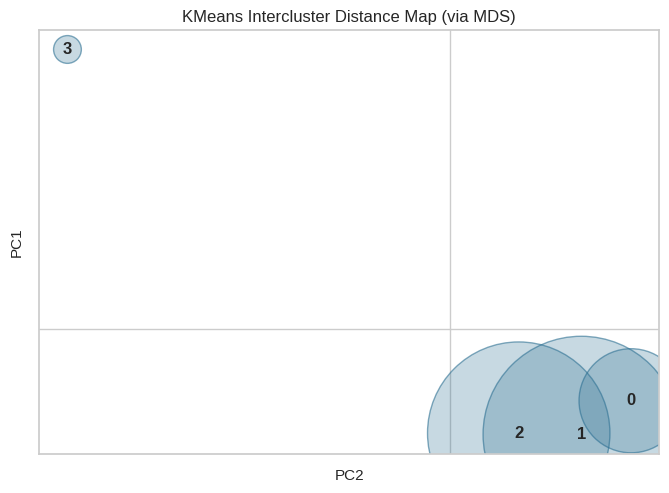

In [28]:
%%time
# optimal number of clusters: intercluster distances
from yellowbrick.cluster import InterclusterDistance
visD = InterclusterDistance(
     KMeans(n_clusters=4, n_init=10), max_size=20000, legend=False, random_state=0)
visD.fit(segment_1_scaled)
visD.finalize()

Les cercles qui se chevauchent ne signifient pas que la séparation des clusters a échoué. Le chevauchement est simplement une conséquence de leur taille (nombre d'enregistrements dans un cluster), combiné à l'aplatissement de l'espace des des données à seulement 2 dimensions.

Même si les clusters semblent se chevaucher dans l'espace 2D, ils ne sont pas nécessairement proches les uns des autres dans leur espace de caractéristiques d'origine. La "malédiction de la dimensionnalité" met de plus grandes distances entre eux dans un espace de dimension supérieure à ce qui est visible en 2D.

# Caractéristiques de chaque clusters

In [29]:
segment_1.groupby('cluster').agg({'Nb_inactive_days' : ['min', 'max', 'median','mean'],
                            'frequency' : ['min', 'max', 'median','mean'],
                            'montant' : ['min', 'max', 'median','mean'],
                           })

Nb_inactive_days                         frequency             \
                     min  max median        mean       min max median   
cluster                                                                 
0                    256  694  373.0  386.562235         1   3    1.0   
1                      0  256  128.0  126.683649         1   3    1.0   
2                      0  694  215.0  230.470281         1  38    3.0   
3                     21  575  259.0  229.565217         4  75   10.0   

                   montant                                     
              mean     min        max    median          mean  
cluster                                                        
0         1.123039   10.07    4042.74    106.78    169.735500  
1         1.114675    9.59    3526.46    109.77    169.280046  
2         4.094111   19.00   12490.88    630.18   1101.345286  
3        14.434783  556.13  109312.64  19167.26  24328.615217

- <ins>Le cluster 0 </ins>  représente le segment de clients qui dépensent beaucoup sur le site, ont une fréquence d'achat assez élevée et un nombre de jours d'inactivité limité. <ins> **Ce segment regroupe les bons clients** </ins>, qui sont fidèles et ont un fort potentiel de dépenses.

- </ins>Le cluster 1</ins> correspond au segment de clients qui n'achètent pas beaucoup, ne dépensent pas beaucoup et sont présents depuis longtemps sur la plateforme. Ce sont les <ins>**clients inactifs**</ins> qui ont peu d'intérêt pour les produits ou services proposés.


- <ins>Le cluster 2 </ins> correspond au segment de clients qui ont la plus faible récence, la plus faible fréquence d'achat et qui dépensent le moins. Ces clients sont considérés comme <ins>**peu engagés et risquent de devenir inactifs**</ins> très bientôt.


- <ins>Le cluster 3 </ins> représente le segment de clients qui ont <ins>**une fréquence d'achat très élevée et qui dépensent le plus** </ins>, mais qui ont également un nombre de jours d'inactivité important. **Ce sont les meilleurs clients en termes de chiffre d'affaires**, mais il est important de les fidéliser pour éviter qu'ils ne deviennent inactifs.

**Représentation des types de clients par profil**

In [30]:
segment_1['profil client'] = segment_1['cluster'].map({ 0: 'Bon client (cluster 0)' , 1:'Client inactif (cluster 1)', 2:'Client peu engagé (cluster 2)', 3 :'Très bon client(cluster 3)'})

In [32]:
import colorlover as cl
#colors = cl.scales['9']['seq']['Blues']
colors = ['#FF0000', '#ff8000', '#00FF00', '##50C878']
fig = go.Figure( data = [go.Pie(values = segment_1['profil client'].value_counts().values,
                                labels = segment_1['profil client'].value_counts().index,
                                title = 'profil client',
                                hole = .5,
                                textinfo='label+percent',
                                marker=dict(colors=colors),)
                                
                        ])
fig.update_layout(width=800, height=600)

fig.show()

#Radar Plot

In [33]:
data=segment_1.groupby('cluster').agg({'Nb_inactive_days' :  'mean',
                            'frequency' : 'mean',
                            'montant' :  'mean',
                           }).reset_index()

data

,cluster,Nb_inactive_days,frequency,montant
0,0,386.562235,1.123039,169.735500
1,1,126.683649,1.114675,169.280046
2,2,230.470281,4.094111,1101.345286
3,3,229.565217,14.434783,24328.615217


In [34]:
segment_1['cluster'].value_counts()

1    51092
0    37744
2     3634
3       23
Name: cluster, dtype: int64

24 induvidus dans le cluster 3

In [35]:
data

import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

# Charger les données
df = data

# Sélectionner les variables à visualiser
variables = ['Nb_inactive_days', 'frequency', 'montant']

# Créer le scaler
scaler = MinMaxScaler()

# Appliquer le scaler sur les données
scaled_data = scaler.fit_transform(df[variables])

# Créer le dataframe avec les données scalées
df_scaled = pd.DataFrame(scaled_data, columns=variables)

# Ajouter la colonne cluster
df_scaled['cluster'] = df['cluster'].values

# Créer un dataframe pour chaque cluster
clusters = df_scaled.groupby('cluster')

# Récupérer les noms des clusters
cluster_names = df_scaled['cluster'].unique()

# Créer la figure Plotly
fig = go.Figure()

# Parcourir les clusters et ajouter chaque radar plot à la figure
for i, cluster in enumerate(clusters):
    data = cluster[1][variables].mean().values.flatten().tolist()
    data += data[:1]
    fig.add_trace(go.Scatterpolar(
        r=data,
        theta=variables + [variables[0]],
        fill='toself',
        name=f'Cluster {cluster_names[i]}'
    ))

# Ajouter le titre et les étiquettes des axes
fig.update_layout(
    title='Radar plot des clusters',
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        ),
    ),
    showlegend=True,

    width=800,
    height=600
)

# Afficher la figure
fig.show()


# Projection sur les plans factoriels

In [36]:
pca=decomposition.PCA(n_components=2)
pca.fit (segment_1_scaled)
print( pca.explained_variance_ratio_.cumsum() )

[0.45974296 0.79312328]


Les axes explique 79% de la variance 

In [37]:
X_trans =pca.transform (segment_1_scaled)

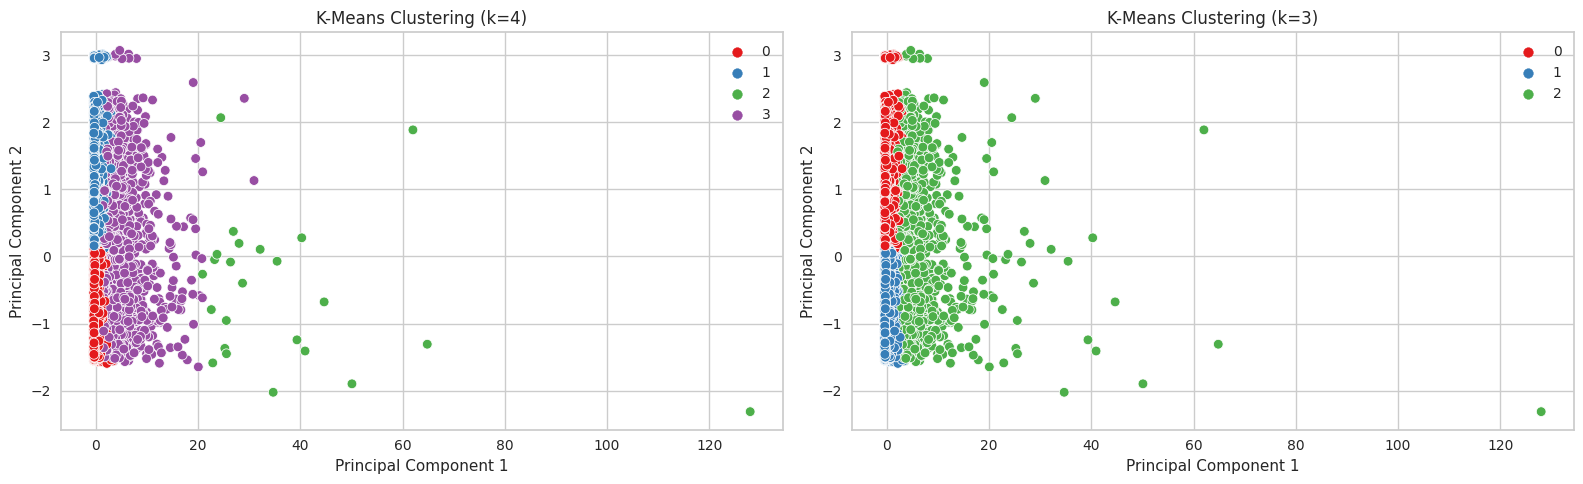

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

fig = plt.figure(figsize=(16,5))
# K-Means Clustering with k=4
cls4 = KMeans(n_clusters=4, n_init=10)
cls4.fit(segment_1_scaled)

# Plot 1 - K-Means Clustering (k=4)
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=cls4.labels_, palette='Set1')
sns.set_style("whitegrid")
plt.title('K-Means Clustering (k=4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# K-Means Clustering with k=3
cls3 = KMeans(n_clusters=3, n_init=10)
cls3.fit(segment_1_scaled)

# Plot 2 - K-Means Clustering (k=3)
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=cls3.labels_, palette='Set1')
sns.set_style("whitegrid")
plt.title('K-Means Clustering (k=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


#<ins> Kmeans pour ma deuxième table </ins>

In [39]:
from yellowbrick.cluster import SilhouetteVisualizer
segment_2_copy=segment_2.drop(['customer_unique_id'], axis=1).copy()
segment_2_scaled = StandardScaler().fit_transform (segment_2_copy)

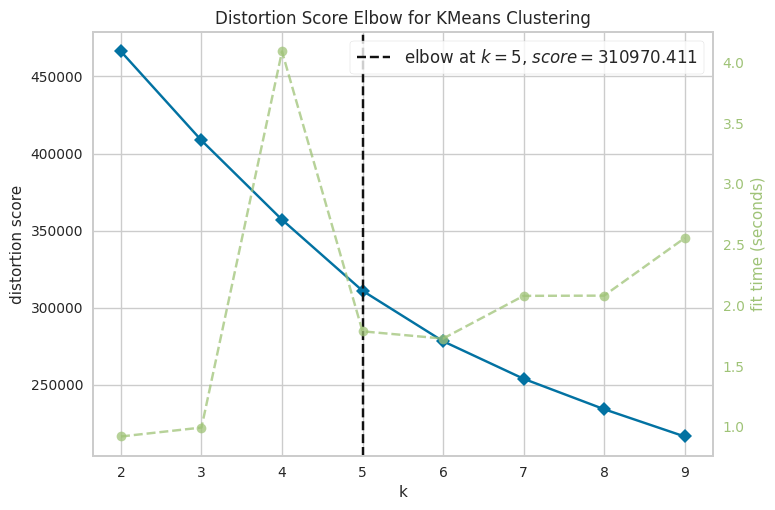



Nombre optimal de clusters pour segment_2 :  5
Score de silhouette pour segment_2 :  0.2756799783593603
Labels de clusters pour segment_2 :  [0 0 1 ... 1 0 1]
CPU times: user 2min 4s, sys: 38.5 s, total: 2min 42s
Wall time: 2min 12s


In [40]:
%%time
# Pour segment_1
model =KMeans(random_state=0,n_init=10)
visualizer_1 = KElbowVisualizer(model, k=(2, 10))
visualizer_1.fit(segment_2_scaled)
visualizer_1.show()


kmeans_1 = KMeans(n_clusters=visualizer_1.elbow_value_, random_state=0,n_init=10).fit(segment_2_scaled)
labels_1 = kmeans_1.labels_  # je peux utliser kmeans_1.predict (segement_1_sample)
score_1 = silhouette_score(segment_2_scaled, labels_1)

print("\n")
print("Nombre optimal de clusters pour segment_2 : ", visualizer_1.elbow_value_)
print("Score de silhouette pour segment_2 : ", score_1)
print("Labels de clusters pour segment_2 : ", labels_1)

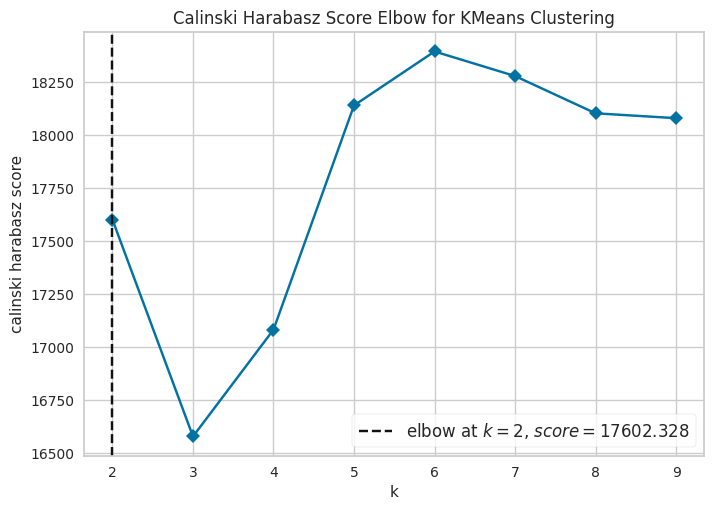

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [33]:
visualizer_1 = KElbowVisualizer(model, k=(2, 10), metric='calinski_harabasz', timings=False)
visualizer_1.fit(segment_2_scaled)
visualizer_1.show()
#plt.title('Elbow method pour segment_1')

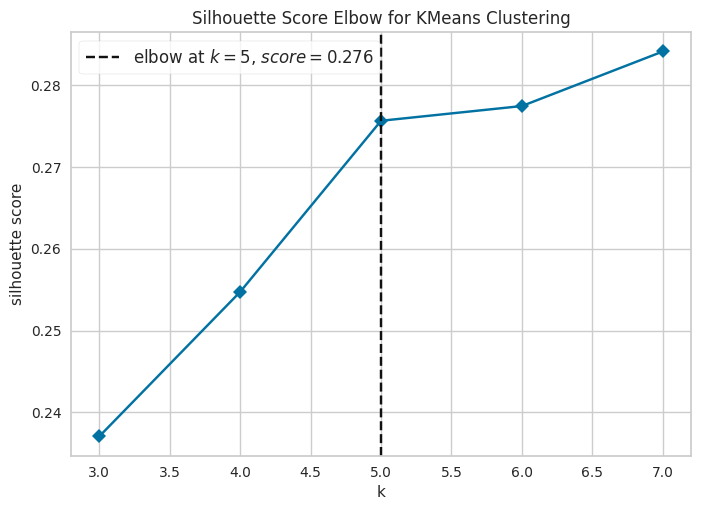

CPU times: user 8min 20s, sys: 2min 36s, total: 10min 56s
Wall time: 8min 48s


<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [41]:
%%time
visualizer_1 = KElbowVisualizer(model, k=(3, 8), metric='silhouette', timings=False)
visualizer_1.fit(segment_2_scaled)
visualizer_1.show()
#plt.title('Elbow method pour segment_1')

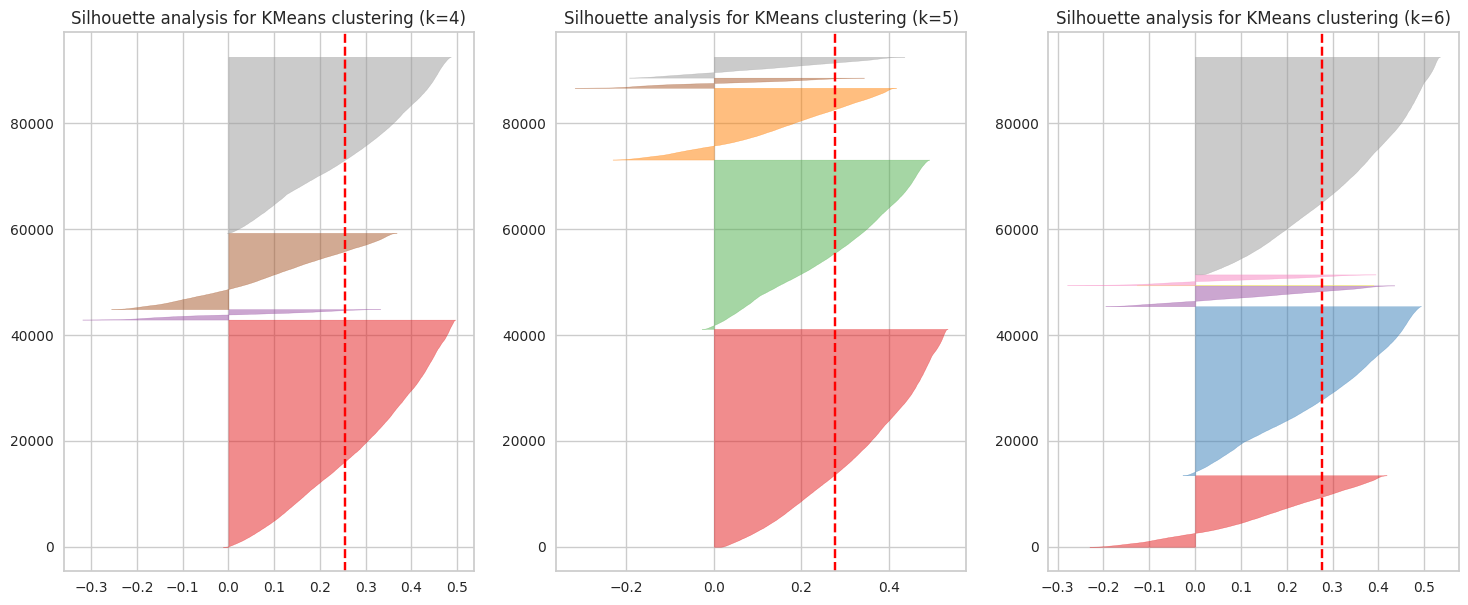

CPU times: user 9min 49s, sys: 3min 7s, total: 12min 56s
Wall time: 10min 20s


In [42]:
%%time
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# Les différents nombres de cluster à tester
cluster_range = range(4, 7)

# Creation de la figure et des subplots
fig, axs = plt.subplots(1, len(cluster_range), figsize=(6 * len(cluster_range), 7))

for i, k in enumerate(cluster_range):
    # clustering model et visualizer pourk clusters
    model = KMeans(k, n_init=10, random_state=0)
    visualizer =  SilhouetteVisualizer(model, ax=axs[i])

    # Fit des données to
    visualizer.fit(segment_2_scaled)
    #visualizer.show()

    # Set the title of the subplot
    axs[i].set_title(f"Silhouette analysis for KMeans clustering (k={k})")

# Display the plot
plt.show()


In [43]:
#Nombre de cluster choisi
nombre_cluster = 5

In [44]:
%%time
#model.fit(scaler.fit_transform (segment_2))
model = KMeans(nombre_cluster, n_init=10, random_state=0)
model.fit(segment_2_scaled)
clusters = model.labels_
segment_2["cluster"] = clusters
segment_2['cluster'] = segment_2['cluster'].astype("category")  

CPU times: user 3.75 s, sys: 762 ms, total: 4.51 s
Wall time: 3.45 s


In [45]:
segment_2['cluster count'] = segment_2['cluster']

In [60]:
data1 =segment_2.groupby('cluster').agg({'Nb_inactive_days' : 'mean',
                                'frequency' : 'mean',
                                'montant' : 'mean',
                                'note_com' : 'mean',
                                'frais_livraison' : 'mean',
                                'temps_moyen_livraison' : 'mean',
                                'cluster count':'count'
                               }).reset_index()
data1.style.background_gradient(cmap='YlGnBu')
data1.rename(columns={'Nb_inactive_days':'recency'}).style.background_gradient(cmap='YlGnBu')

,cluster,recency,frequency,montant,note_com,frais_livraison,temps_moyen_livraison,cluster count
0,0,122.984321,1.137898,151.859692,4.643550,17.172908,9.253361,41139
1,1,390.372743,1.141570,157.590317,4.596661,17.503821,11.053061,31963
2,2,232.949439,1.247269,201.144655,1.644665,19.818049,21.863596,13548
3,3,242.124673,5.227344,1790.877444,3.709360,19.716619,11.360398,1909
4,4,190.794103,1.111337,556.403592,4.275758,74.640649,15.960346,3934


In [50]:
segment_2['profil client'] = segment_2['cluster'].map({ 0: 'clients tièdes (cluster 0)', 1:'Satisfait-peu actifs (cluster 1)', 2:'Mécontents-peu actifs (cluster 2)', 3 :'Très bons clients (cluster 3)', 4: 'Bons clients (cluster4)'})
import colorlover as cl
#colors = cl.scales['9']['seq']['Blues']
colors = ['#ff8000','#FBB124', '#FF0000', '#90EE90', '#00ab41']
fig = go.Figure( data = [go.Pie(values = segment_2['profil client'].value_counts().values,
                                labels = segment_2['profil client'].value_counts().index,
                                title = 'profil client',
                                hole = .5,
                                textinfo='label+percent',
                                marker=dict(colors=colors),)
                                
                        ])
fig.update_layout(width=800, height=600)

fig.show()

Présenter les radars pour chaque cluster.

In [51]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# Charger les données
df = data1

# Sélectionner les variables à visualiser
variables = ['Nb_inactive_days', 'frequency', 'montant', 'note_com', 'frais_livraison', 'temps_moyen_livraison']

# Créer le scaler

# Appliquer le scaler sur les données
scaled_data = MinMaxScaler().fit_transform(df[variables])

# Créer le dataframe avec les données scalées
df_scaled = pd.DataFrame(scaled_data, columns=variables)

# Ajouter la colonne cluster
df_scaled['cluster'] = df['cluster'].values

# Créer un dataframe pour chaque cluster
clusters = df_scaled.groupby('cluster')

# Récupérer les noms des clusters
cluster_names = df_scaled['cluster'].unique()

# Créer une figure Plotly avec 6 sous-figures polar
fig = make_subplots(rows=2, cols=3, subplot_titles=[f'Cluster {name}' for name in cluster_names], specs=[[{'type': 'polar'}]*3]*2, horizontal_spacing=0.001, vertical_spacing=0.2)

# Parcourir les clusters et ajouter un radar plot à chaque sous-figure
for i, cluster in enumerate(clusters):
    data11 = cluster[1][variables].mean().values.flatten().tolist()
    data11 += data11[:1]

    fig.add_trace(go.Scatterpolar(
        r=data11,
        theta=variables + [variables[0]],
        fill='toself',
        name=f'Cluster {cluster_names[i]}'
    ), row=(i // 3) + 1, col=(i % 3) + 1)

    # Ajouter les étiquettes des axes pour chaque sous-figure
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1]
            ),
        ),
        showlegend=True,
        width=1800,
        height=900
    )

# Mettre à jour le titre de la figure
fig.update_layout(title_text='Radar plot des clusters')

# Afficher la figure
fig.show()


Projection des clusters sur les plans factoriels.

In [52]:
pca=decomposition.PCA(n_components=3)
pca.fit (segment_2_scaled)
print( pca.explained_variance_ratio_.cumsum() )

[0.25477342 0.47107023 0.64649318]


In [53]:
X_trans =pca.transform (segment_2_scaled)

Projection sur le plan factoriel sur 3

In [54]:
import plotly.graph_objs as go

# K-Means Clustering with k=5
#cls5 = KMeans(n_clusters=5, n_init=10)
#cls5.fit(segment_2_scaled)

fig = go.Figure(data=[go.Scatter3d(x=X_trans[:,0], y=X_trans[:,1], z=X_trans[:,2],
                                   mode='markers',
                                   marker=dict(color=model.labels_, 
                                               colorscale='Viridis', 
                                               opacity=0.8)
                                  )
                     ])

fig.update_layout(scene=dict(xaxis_title='Principal Component 1',
                             yaxis_title='Principal Component 2',
                             zaxis_title='Principal Component 3'),
                  title='K-Means Clustering (k=5)')

fig.show()


Output hidden; open in https://colab.research.google.com to view.

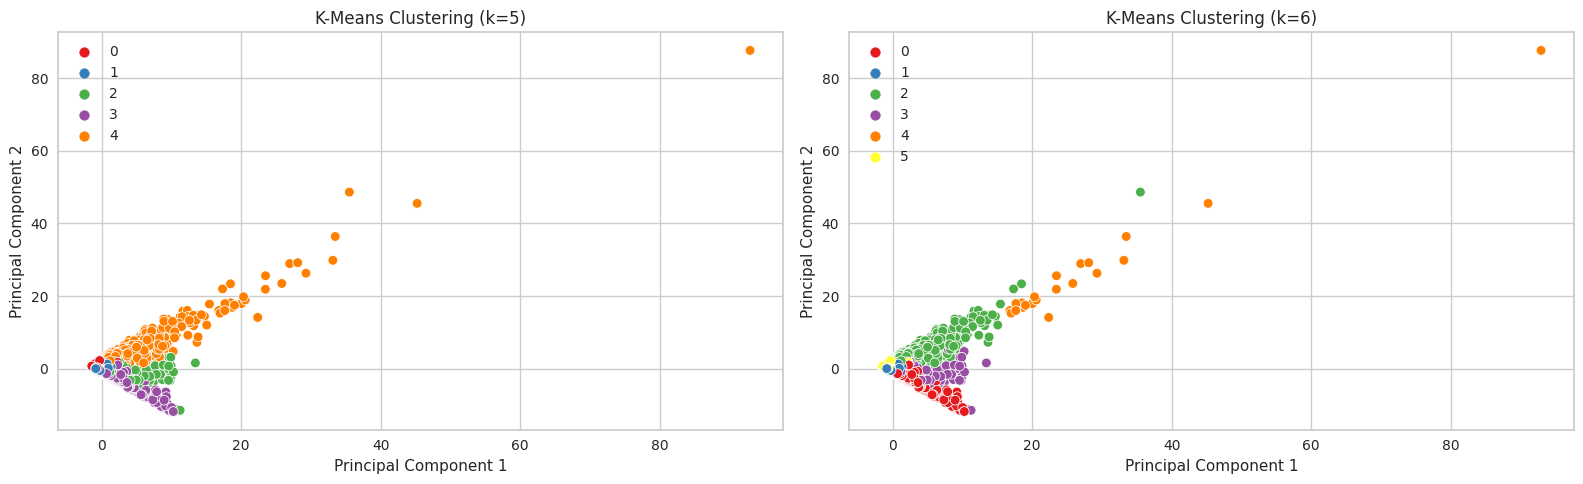

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

fig = plt.figure(figsize=(16,5))
# K-Means Clustering with k=5
cls4 = KMeans(n_clusters=5, n_init=10)
cls4.fit(segment_2_scaled)

# Plot 1 - K-Means Clustering (k=5)
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=cls4.labels_, palette='Set1')
sns.set_style("whitegrid")
plt.title('K-Means Clustering (k=5)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# K-Means Clustering with k=6
cls3 = KMeans(n_clusters=6, n_init=10)
cls3.fit(segment_2_scaled)

# Plot 2 - K-Means Clustering (k=6)
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=cls3.labels_, palette='Set1')
sns.set_style("whitegrid")
plt.title('K-Means Clustering (k=6)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

CPU times: user 4.81 s, sys: 456 ms, total: 5.26 s
Wall time: 6.62 s


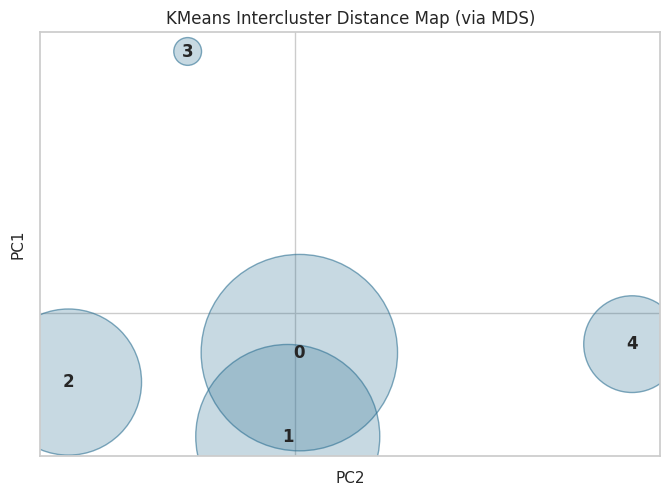

In [58]:
%%time
# optimal number of clusters: intercluster distances
from yellowbrick.cluster import InterclusterDistance
visD = InterclusterDistance(
     KMeans(nombre_cluster, n_init=10, random_state=0), max_size=20000, legend=False, random_state=0)
visD.fit(segment_2_scaled)
visD.finalize()

#<ins> k-means pour la table **segment_3** </ins>

Les résultats de clustering pour cettetable ne sont pas exploitables, ni pertinents.

In [56]:
segment_2

,customer_unique_id,Nb_inactive_days,frequency,montant,note_com,frais_livraison,temps_moyen_livraison,cluster,cluster count,profil client
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,5.0,12.00,6.0,5,5,Réguliers-peu actifs (cluster 5)
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4.0,8.29,3.0,5,5,Réguliers-peu actifs (cluster 5)
2,0000f46a3911fa3c0805444483337064,536,1,86.22,3.0,17.22,25.0,1,1,Satisfait-peu actif (cluster 1)
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,4.0,17.63,20.0,1,1,Satisfait-peu actif (cluster 1)
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,5.0,16.89,13.0,1,1,Satisfait-peu actif (cluster 1)
...,...,...,...,...,...,...,...,...,...,...
92488,fffcf5a5ff07b0908bd4e2dbc735a684,446,2,4134.84,5.0,248.71,27.0,2,2,Fidèles-dépensiers. (cluster 2)
92489,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,4.0,19.69,30.0,0,0,Mécontents-inactifs. (cluster 0)
92490,ffff371b4d645b6ecea244b27531430a,567,1,112.46,5.0,22.56,14.0,1,1,Satisfait-peu actif (cluster 1)
92491,ffff5962728ec6157033ef9805bacc48,118,1,133.69,5.0,18.69,11.0,5,5,Réguliers-peu actifs (cluster 5)


In [57]:
#Merge entre segment_2 et data
df_merged = pd.merge(segment_2, data, on='customer_unique_id', how='left')

TypeError: ignored

In [ ]:
df_cluster=df_merged.groupby ('cluster').agg({'Nb_inactive_days_x' : 'mean',
                                'frequency_x' : 'mean',
                                'montant_x' : 'mean',
                                'note_com_x' : 'mean',
                                'frais_livraison_x' : 'mean',
                                'temps_moyen_livraison_x' : 'mean',
                                'Alimentation et Boissons' :'sum',
                                'Auto et Moto':'sum',
                                'Livres et Médias':'sum',
                                'Maison et Jardin': 'sum',
                                'Mode': 'sum',
                                'Santé et Beauté': 'sum',
                                'Sports et Loisirs':'sum',
                                'Électronique':'sum',
                                'Autres':'sum'

                               })

In [ ]:
va=['Alimentation et Boissons', 'Auto et Moto', 'Livres et Médias', 'Maison et Jardin', 'Mode', 'Santé et Beauté', 'Sports et Loisirs', 'Électronique', 'Autres']

# On calcule la somme de toutes les colonnes de va
df_cluster['total_category'] = df_cluster[va].sum(axis=1)

# On normalise chaque colonne de va par la somme totale
for v in va:
  df_cluster[v] = round((df_cluster[v] / df_cluster['total_category']) * 100, 2)

# On supprime la colonne 'total_category'
#df_cluster.drop('total_category', axis=1, inplace=True)"""

# On affiche le dataframe modifié
df_cluster

In [ ]:
import matplotlib.pyplot as plt

# Définir les noms de colonnes à tracer
va=['Alimentation et Boissons', 'Auto et Moto', 'Livres et Médias', 'Maison et Jardin', 'Mode', 'Santé et Beauté', 'Sports et Loisirs', 'Électronique', 'Autres']

# Créer une figure avec une grille de sous-graphiques pour chaque cluster
fig, axs = plt.subplots(nrows=1, ncols=len(df_cluster.index), figsize=(20, 5))

# Pour chaque cluster, tracer un histogramme pour chaque variable dans un sous-graphique
for i in range(len(df_cluster.index)):
    cluster_df = df_cluster.loc[[i], :]
    ax = axs[i]
    cluster_df[va].T.plot(kind='bar', legend=None, ax=ax)
    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('Variable')
    ax.set_ylabel('Pourcentage')
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Afficher les graphiques
plt.tight_layout()
plt.show()

